In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction import DictVectorizer
import numpy as np

In [3]:
#df = pd.read_csv("name_train.csv")
df = pd.read_csv("genero-nomes.csv")

In [4]:
df.head()

,first_name,group_name,classification,frequency_female,frequency_male,frequency_total,frequency_group,ratio,alternative_names
0,AABRAO,ABRAAO,M,NaN,26.0,26,32296,1.0,ABRAAO|ABRAHAO|ABRAO|ABRHAO|ABRRAO|ADRAAO|ADRA...
1,AADRIANA,ADRIANA,F,94.0,NaN,94,568459,1.0,ABRIANA|ADRAINA|ADRIANA|ADRIANNA|ADRRIANA|ADRY...
2,AADRIANO,ADRIANO,M,NaN,53.0,53,338554,1.0,ABRIANO|ADRIANNO|ADRIANO|ADRYANO
3,AAILTON,AILTON,M,NaN,23.0,23,246915,1.0,AELTOM|AELTON|AHILTON|AILTHON|AILTOM|AILTON|AL...
4,AALAN,ALAN,M,NaN,27.0,27,221601,1.0,AHLAM|AILAM|AILAN|ALAAN|ALAM|ALAN|ALANN|AYLAN|...


In [5]:
df = df.drop(columns=['group_name', 'frequency_total','frequency_female','frequency_male','frequency_group','ratio','alternative_names'])

In [6]:
df[df['first_name'] == 'ALESSANDRA'].head()

,first_name,classification
4698,ALESSANDRA,F


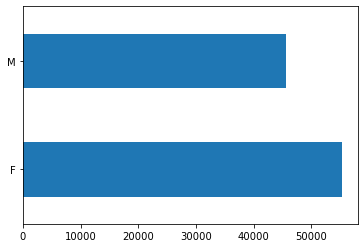

In [21]:
df.classification.value_counts().plot(kind='barh')

In [68]:
df.groupby('classification').count()

,first_name
classification,
F,55250
M,45537


In [69]:
df = df.drop(df.index[df['classification'] == 'N'])

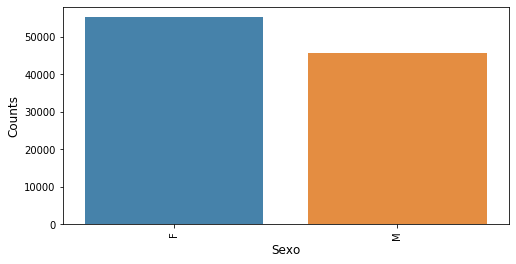

In [70]:
label_counts = df.classification.value_counts()
plt.figure(figsize = (8,4))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Sexo', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [71]:
df['gender'] = df['classification'].apply(lambda x: 1 if x == 'M' else 0 )

In [72]:
df.first_name.describe()

count       100787
unique      100787
top       ELINELMA
freq             1
Name: first_name, dtype: object

In [73]:
df.head()

,first_name,classification,gender
0,AABRAO,M,1
1,AADRIANA,F,0
2,AADRIANO,M,1
3,AAILTON,M,1
4,AALAN,M,1


In [74]:
# Feature Extraction 
#cv = CountVectorizer()
#X = cv.fit_transform(Xfeatures)

In [75]:
#from sklearn.model_selection import train_test_split

In [76]:
# Features 
#X
# Labels
#y = df.classification

In [77]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
# By Analogy most female names ends in 'A' or 'E' or has the sound of 'A'
def features(name):
    name = name.lower()
    return {
        'first-letter': name[0], # First letter
        'first2-letters': name[0:2], # First 2 letters
        'first3-letters': name[0:3], # First 3 letters
        'last-letter': name[-1],
        'last2-letters': name[-2:],
        'last3-letters': name[-3:],
    }

In [79]:
# Vectorize the features function
features = np.vectorize(features)

In [80]:
# Extract the features for the dataset
df_X = features(df['first_name'])

In [81]:
df_y = df['classification']

In [82]:
# Train Test Split
from sklearn.model_selection import train_test_split

dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(df_X, df_y, test_size=0.33, random_state=42)

In [83]:
from sklearn.feature_extraction import DictVectorizer
 
corpus = features(["Mike", "Julia"])
dv = DictVectorizer()
dv.fit(corpus)
transformed = dv.transform(corpus)
print(transformed)

  (0, 1)	1.0
  (0, 3)	1.0
  (0, 5)	1.0
  (0, 7)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 4)	1.0
  (1, 6)	1.0
  (1, 8)	1.0
  (1, 11)	1.0


In [84]:
# Model building Using DecisionTree
from sklearn.tree import DecisionTreeClassifier
 
dclf = DecisionTreeClassifier()
my_xfeatures = dv.transform(dfX_train)
dclf.fit(my_xfeatures, dfy_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
result = dclf.score(dv.transform(dfX_test), dfy_test)

In [86]:
print(result)

0.8366806975345761


In [87]:
# Build Features and Transform them
sample_name_eg = ["Valdir"]
transform_dv = dv.transform(features(sample_name_eg))
vect3 = transform_dv.toarray()
dclf.predict(vect3)

array(['M'], dtype=object)

In [88]:
from sklearn.externals import joblib

In [89]:
decisiontreModel = open("decisiontreemodel.pkl","wb")

In [90]:
joblib.dump(dclf, decisiontreModel)

In [91]:
decisiontreModel.close

<function BufferedWriter.close>